<a href="https://colab.research.google.com/github/Salman-Fazal-7/Me-vs-My-friend/blob/main/Testing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# load model

In [ ]:
from tensorflow.keras.models import load_model

# Make sure the path is correct after downloading
model = load_model('/content/salman_and_rizwan_2.h5')
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,123 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


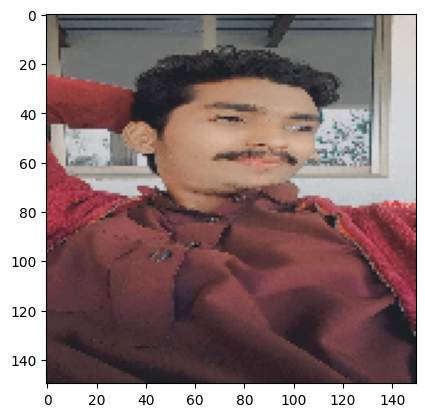

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


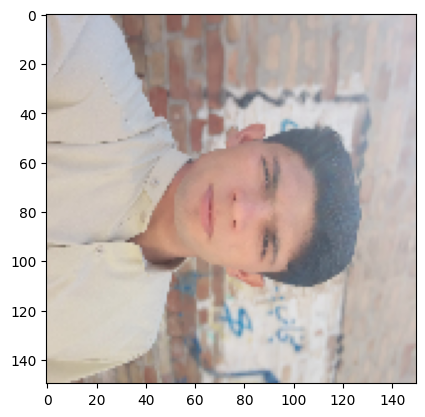

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


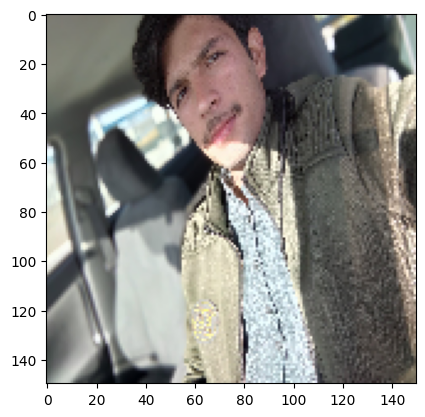

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


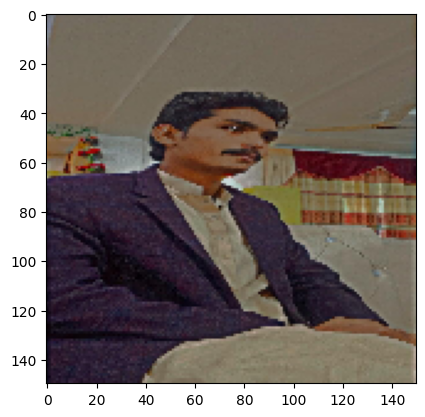

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


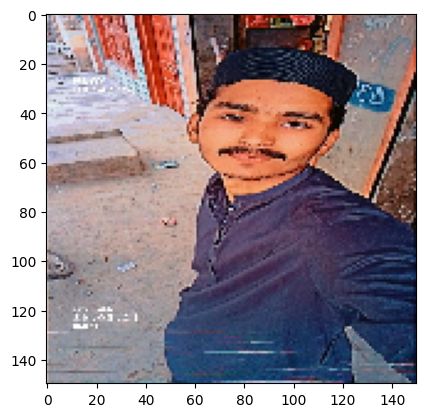

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


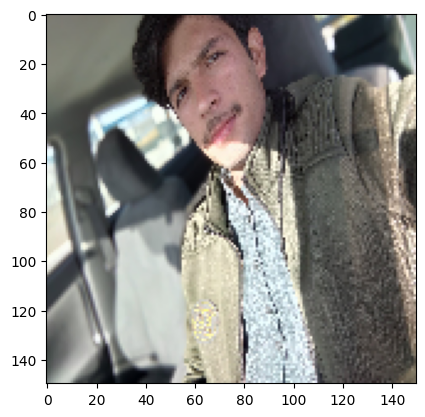

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


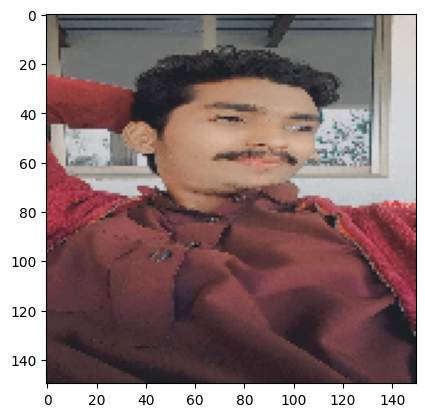

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


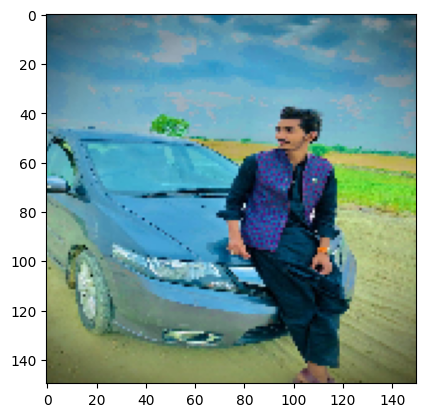

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


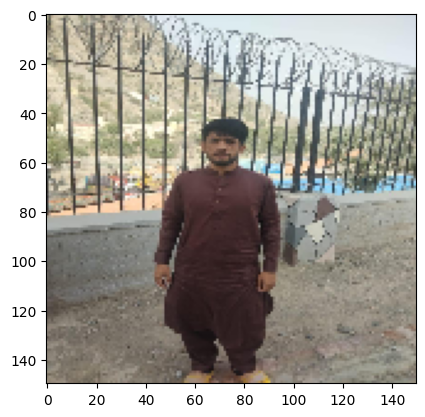

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


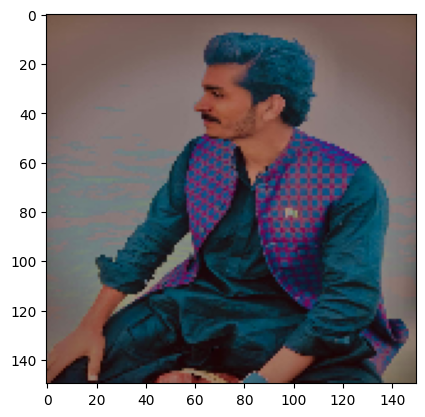

In [ ]:
import math
from random import randint

predlist = []

for i in range(10):

    #copy the test folder(containing 12500 images) from actuall downloaded dataset
    #and paste it in CNN folder
    img_path = f'/content/drive/MyDrive/Colab Notebooks/work/test/{randint(1,20)}.jpg'

    from tensorflow.keras.preprocessing import image
    import numpy as np

    img = image.load_img(img_path, target_size=(150,150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /=255.

    predlist.append(model.predict(img_tensor))

    import matplotlib.pyplot as plt

    plt.imshow(img_tensor[0])
    plt.show()

In [ ]:
print(predlist)

for pred in predlist:

    if pred >= .50:      #sigmoid activation function(range: 0 - 1)- 1st category: Salman - 0,
                                                                    #2nd category: Rizwan - 1
        print("Salman")

    else:
        print("Rizwan")

predlist

[array([[0.47549433]], dtype=float32), array([[0.98377293]], dtype=float32), array([[0.99986935]], dtype=float32), array([[0.36886227]], dtype=float32), array([[0.06086659]], dtype=float32), array([[0.99986935]], dtype=float32), array([[0.47549433]], dtype=float32), array([[5.47424e-09]], dtype=float32), array([[0.9999348]], dtype=float32), array([[1.09527285e-07]], dtype=float32)]
Rizwan
Salman
Salman
Rizwan
Rizwan
Salman
Rizwan
Rizwan
Salman
Rizwan


[array([[0.47549433]], dtype=float32),
 array([[0.98377293]], dtype=float32),
 array([[0.99986935]], dtype=float32),
 array([[0.36886227]], dtype=float32),
 array([[0.06086659]], dtype=float32),
 array([[0.99986935]], dtype=float32),
 array([[0.47549433]], dtype=float32),
 array([[5.47424e-09]], dtype=float32),
 array([[0.9999348]], dtype=float32),
 array([[1.09527285e-07]], dtype=float32)]